In [1121]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests as rq
import json
from timeit import default_timer as timer
%matplotlib inline

# 1 - Gathering Data for this Project

Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

    The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: 
    
   ## 1.1 - Twitter_archive_enhanced.csv
   File downloaded manually to library and is going to be referenced as **archive**

In [1122]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1377,701601587219795968,NaN,NaN,2016-02-22 02:57:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coopson. He's a Blingin Schnitzel. Bui...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701601587...,10,10,Coopson,None,None,None,None
1381,700890391244103680,NaN,NaN,2016-02-20 03:51:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's dapper af. His owners want ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700890391...,11,10,Chet,None,None,None,None
1571,687704180304273409,NaN,NaN,2016-01-14 18:33:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Blakely. He thinks that's a hat. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687704180...,9,10,Blakely,None,None,pupper,None


## 1.2 - Image_prediction_tsv
The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following 
URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

This file is downlaoded programmiticaly and well be referenced as **image_prediction**

In [1123]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_prediction_temp = rq.get(url)

with open('image_predictions.tsv', mode ='wb') as file:
    file.write(image_prediction_temp.content)
    
image_prediction = pd.read_csv('image_predictions.tsv' , sep='\t')
image_prediction.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1063,715342466308784130,https://pbs.twimg.com/media/Ce1oLNqWAAE34w7.jpg,1,West_Highland_white_terrier,0.597111,True,soft-coated_wheaten_terrier,0.142993,True,Lakeland_terrier,0.136712,True
652,682032003584274432,https://pbs.twimg.com/media/CXcQfUNUQAEwFoQ.jpg,1,schipperke,0.997953,True,groenendael,0.000676,True,miniature_pinscher,0.000211,True
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False


## 1.3 - 'Accessing Project Data Without a Twitter Account'

Due to twitter account access limitations, (Developer account request not approved) ,  the following code cell is commented out, it exists for readability, json data will be accessed using the json file provided in Twitter API section. 

In [1124]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'


#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
#Save each tweet's returned JSON as a new line in a .txt file
#    with open('tweet_json.txt', 'w') as outfile:
#    This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#       count += 1
#       print(str(count) + ": " + str(tweet_id))
#       try:
#          tweet = api.get_status(tweet_id, tweet_mode='extended')
#          print("Success")
#          json.dump(tweet._json, outfile)
#          outfile.write('\n')
#       except tweepy.TweepError as e:
#          print("Fail")
#          fails_dict[tweet_id] = e
#          pass
#end = timer()
#print(end - start)
#print(fails_dict)

## 1.3.1 - Json - Data file 
Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. This is considered as the API json file and will be referenced as **tweet_df**. 

In [1125]:
# appending json file contents into a list
tweet_df = []
with open('tweet_json.txt', 'r') as tweet_file:
    for item in tweet_file:
        status = json.loads(item)
        tweet_df.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                         'full_text': status['full_text']
                       })
        
# Tweet json file will be converted into a data frame
tweet_df = pd.DataFrame(tweet_df)
tweet_df.sample(3)

,favorite_count,full_text,retweet_count,tweet_id
331,0,RT @EmilieGambril: 12/10 h*cking excited about...,43,832769181346996225
221,0,RT @dog_rates: This is Gidget. She's a spy pup...,5513,849668094696017920
1563,1878,This is Kilo. He's a Pouncing Brioche. Really ...,408,688064179421470721


# 2 - Quality , Tideness Assesment section
Assessing Data for this Project

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

**Quality testing:**
- Archive Datatype incorrect (tweet_id , timestamp)
- Columns (in_reply_to_status_id , in_reply_to_user_id  , retweeted_status_id , retweeted_status_user_id), need to be removed as they are linked to retweets.
- Retweets are not valid oringinal tweets, need removal. 
- Null Values: many columns tend to have alot of null values.
- Source column shows a hyberlink, needs to remove the link and exctract the real source. 
- Name column contains Nulls and non-correct names.  
- Image prediction tweet id is of type int, should be str. 
- Image prediction contains records of non - dogs. (removal)
- Json file tweet_di is of type int, should be str.
- text & full_text columns are indentical, one should be removed when merged. 

**Tidness testing**
- Id columns dont match between tables, so number of recrods. 
- Columns ( doggo , floofer , pupper , puppo ) should be combined into a catergorial type (stages). 

## **2.1 - Archive**

We would take a look into the table sample to understand its structure, then info function will show more about it. Describe funciton is an other usefull tool. This mothod will be applied for all tables. 

In [1126]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1616,685198997565345792,NaN,NaN,2016-01-07 20:39:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. That is his time machine. He's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685198997...,11,10,Alfie,None,None,None,None
882,760290219849637889,NaN,NaN,2016-08-02 01:44:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Rocco. He's doing his best. 13/10 some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760290219...,13,10,Rocco,None,None,None,None
1042,743895849529389061,NaN,NaN,2016-06-17 19:59:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're given AUX cord privileges from the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743895849...,10,10,None,None,None,None,None
2324,666421158376562688,NaN,NaN,2015-11-17 01:02:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*internally screaming* 12/10 https://t.co/YMcr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666421158...,12,10,None,None,None,None,None


In [1127]:
archive.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [1128]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


## **2.2 - Image prediction table**

We would take a look into the table sample to understand its structure, then info function will show more about it. Describe funciton is an other usefull tool. 

In [1129]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1436,773922284943896577,https://pbs.twimg.com/media/Cr2GNdlW8AAbojw.jpg,1,Pomeranian,0.554331,True,Samoyed,0.432158,True,chow,0.003199,True
1007,709198395643068416,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True
1548,792883833364439040,https://pbs.twimg.com/media/CwDjoH3WAAIniIs.jpg,3,jack-o'-lantern,0.999306,False,basketball,0.000113,False,standard_poodle,0.000083,True
1331,757611664640446465,https://pbs.twimg.com/media/CoOTyXJXEAAtjs9.jpg,1,bluetick,0.829259,True,beagle,0.145358,True,Walker_hound,0.019595,True
1352,759923798737051648,https://pbs.twimg.com/media/CovKqSYVIAAUbUW.jpg,1,Labrador_retriever,0.324579,True,seat_belt,0.109168,False,pug,0.102466,True


In [1130]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1131]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## **2.3 - Json Data File**

We would take a look into the table sample to understand its structure, then info function will show more about it. Describe funciton is an other usefull tool. 

In [1132]:
tweet_df.sample(5)

,favorite_count,full_text,retweet_count,tweet_id
2119,600,This is Peanut. He was the World Table Tennis ...,249,670408998013820928
534,0,RT @dog_rates: This is Cali. She arrived preas...,8521,807059379405148160
2053,1193,This is Tanner. He accidentally dropped all hi...,325,671362598324076544
812,6898,This is Charlie. He works for @TODAYshow. Supe...,1663,771102124360998913
792,24553,This is Chelsea. She forgot how to dog. 11/10 ...,7126,773547596996571136


In [1133]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
full_text         2354 non-null object
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [1134]:
tweet_df.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


<b>Section Summery:</b> looking to above tables and information, all tables tend to have alot of issues that need to be invistigated and cleaned. Next sections will go through the preperation of the data by invistigating and cleaning when neccessary. 

# 3 - Cleaning Section
In this section, all data quality and tideness issues will be cleaned, this includes:
- Dataype fixes
- removing duplicated values
- removing null values
- merging columns if required
- merging cleaned tables into a master dataframe. 

## **3.1 - Archive**
dtypes test

In [1135]:
archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

**First** some columns needs to be converted into the proper data type. 

In [1136]:
archive['tweet_id'] = archive['tweet_id'].astype(str)
archive['in_reply_to_status_id'] = archive['in_reply_to_status_id'].astype(str)
archive['in_reply_to_user_id'] = archive['in_reply_to_user_id'].astype(str)
archive['retweeted_status_id'] = archive['retweeted_status_id'].astype(str)
archive['retweeted_status_user_id'] = archive['retweeted_status_user_id'].astype(str)
archive['timestamp'] = pd.to_datetime(archive['timestamp'])
archive['retweeted_status_timestamp'] = pd.to_datetime(archive['retweeted_status_timestamp'])

In [1137]:
archive.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

## **3.2 - Archive drop Nulls**
null values test, alot of columns tend to have nulls, but retweeted_status_timestamp tends to have the most, so it would be better to drop it. 

In [1138]:
archive.retweeted_status_timestamp.isnull().sum()        

2175

In [1139]:
archive.drop('retweeted_status_timestamp' , axis=1 , inplace=True)

In [1140]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                    2356 non-null object
in_reply_to_status_id       2356 non-null object
in_reply_to_user_id         2356 non-null object
timestamp                   2356 non-null datetime64[ns]
source                      2356 non-null object
text                        2356 non-null object
retweeted_status_id         2356 non-null object
retweeted_status_user_id    2356 non-null object
expanded_urls               2297 non-null object
rating_numerator            2356 non-null int64
rating_denominator          2356 non-null int64
name                        2356 non-null object
doggo                       2356 non-null object
floofer                     2356 non-null object
pupper                      2356 non-null object
puppo                       2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(13)
memory usage: 294.6+ KB


## 3.3 -  Source Column Fix

Source column values contains a link to the source type of information, it is recommended that we remove the lind form value. 

In [1141]:
source = archive['source']
source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [1142]:
archive['source'].replace(source.unique()[0],'Twitter for iPhone',inplace=True)
archive['source'].replace(source.unique()[1],'Twitter Web Client',inplace=True)
archive['source'].replace(source.unique()[2],'Vine - Make a Scene',inplace=True)
archive['source'].replace(source.unique()[3],'TweetDeck',inplace=True)
archive.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

## 3.4 - Name Column Fix

most of the values on name column has unexpected values, they would be better replaced with dummy values or in this case, I would put them Unnamed. 

In [1143]:
archive['name'].replace(['None','a',' None'],'Unnammed',inplace=True)
archive.name.value_counts()

Unnammed        800
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Penny            10
Lola             10
Tucker           10
Bo                9
Winston           9
the               8
Sadie             8
Toby              7
Buddy             7
an                7
Daisy             7
Bailey            7
Leo               6
Dave              6
Stanley           6
Jack              6
Oscar             6
Scout             6
Jax               6
Milo              6
Koda              6
Bella             6
Rusty             6
Louis             5
Phil              5
               ... 
Jockson           1
Pluto             1
BeBe              1
Dwight            1
Jarod             1
Bradlay           1
Saydee            1
Howie             1
Jerome            1
Kane              1
Willow            1
Jeffrie           1
Severus           1
Shakespeare       1
Grady             1
Rumble            1
Edgar             1
Charleson         1
unacceptable      1


## **3.5 - Retweets**

Retweets are not valid tweets, they are better removed for validity. 

In [1144]:
retweets = archive[archive.text.str.contains('RT @')]
retweets.sample(3) 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
615,796563435802726400,nan,nan,2016-11-10 04:01:37,Twitter for iPhone,RT @dog_rates: I want to finally rate this ico...,7.809316141509837e+17,4196983835.0,https://twitter.com/dog_rates/status/780931614...,13,10,Unnammed,None,None,None,puppo
811,771171053431250945,nan,nan,2016-09-01 02:21:21,Twitter for iPhone,RT @dog_rates: This is Frankie. He's wearing b...,6.733201328113664e+17,4196983835.0,https://twitter.com/dog_rates/status/673320132...,11,10,Frankie,None,None,None,None
506,812747805718642688,nan,nan,2016-12-24 19:52:31,Twitter for iPhone,RT @dog_rates: Meet Sammy. At first I was like...,6.800554559518843e+17,4196983835.0,https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,None,None,None,None


The following columns would have no use after deleting the retweets, it is recommended to remove them. 

'in_reply_to_user_id'
'in_reply_to_status_id'
'retweeted_status_id'
'retweeted_status_user_id'

In [1145]:
archive.drop(retweets.index, inplace=True)
archive.drop(['in_reply_to_user_id','in_reply_to_status_id',
              'retweeted_status_id','retweeted_status_user_id'], axis=1, inplace=True)

In [1146]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


## 3.6 - Dog Stage

Congesting the table with columns is not a good practice, instead a consildated column should hold the category type meant to be from theses columns. 

A new column called Stage will be created, all values from other stages columns will be assigned to the new one. 

an other issue is that, these columns have alot of 'None' values, they should be removed. 

In [1147]:
archive[['doggo','floofer','pupper','puppo']].describe()

,doggo,floofer,pupper,puppo
count,2175,2175,2175,2175
unique,2,2,2,2
top,None,None,None,None
freq,2088,2165,1941,2150


In [1148]:
archive['Stage'] = ''
archive['doggo'].replace('None','',inplace=True)
archive['pupper'].replace('None','',inplace=True)
archive['floofer'].replace('None','',inplace=True)
archive['puppo'].replace('None','',inplace=True)

In [1149]:
archive[['doggo','floofer','pupper','puppo']].describe()

,doggo,floofer,pupper,puppo
count,2175,2175,2175,2175
unique,2,2,2,2
top,,,,
freq,2088,2165,1941,2150


In [1150]:
archive['Stage'] = archive['pupper']+archive['floofer']+archive['puppo']+archive['doggo']

In [1151]:
archive[['doggo','floofer','pupper','puppo']].describe()

,doggo,floofer,pupper,puppo
count,2175,2175,2175,2175
unique,2,2,2,2
top,,,,
freq,2088,2165,1941,2150


In [1152]:
archive[['doggo','floofer','pupper','puppo']].nunique()

doggo      2
floofer    2
pupper     2
puppo      2
dtype: int64

**Interseting** next cells will show records of dogs with hyprid stages. 

In [1153]:
archive.Stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'puppodoggo',
       'flooferdoggo', 'pupperdoggo'], dtype=object)

In [1154]:
archive.Stage.replace(archive.Stage.unique()[0],'Undefined',inplace=True)

In [1155]:
archive.query('Stage=="flooferdoggo"|Stage=="pupperdoggo"|Stage=="puppodoggo"').count()

tweet_id              12
timestamp             12
source                12
text                  12
expanded_urls         12
rating_numerator      12
rating_denominator    12
name                  12
doggo                 12
floofer               12
pupper                12
puppo                 12
Stage                 12
dtype: int64

In [1156]:
archive.query('Stage !="" ').sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Stage
1271,709409458133323776,2016-03-14 16:02:49,Twitter for iPhone,This is Billy. He sensed a squirrel. 8/10 damn...,https://twitter.com/dog_rates/status/709409458...,8,10,Billy,,,,,Undefined
1158,724049859469295616,2016-04-24 01:38:33,Twitter for iPhone,This is Kreggory. He just took a look at his s...,https://twitter.com/dog_rates/status/724049859...,10,10,Kreggory,,,,,Undefined
608,797971864723324932,2016-11-14 01:18:12,Twitter for iPhone,Here's a helicopter pupper. He takes off at ra...,https://twitter.com/dog_rates/status/797971864...,12,10,Unnammed,,,pupper,,pupper
31,886258384151887873,2017-07-15 16:17:19,Twitter for iPhone,This is Waffles. His doggles are pupside down....,https://twitter.com/dog_rates/status/886258384...,13,10,Waffles,,,,,Undefined
1486,693109034023534592,2016-01-29 16:30:45,Twitter for iPhone,"""Thank you friend that was a swell petting"" 11...",https://twitter.com/dog_rates/status/693109034...,11,10,Unnammed,,,,,Undefined


**Seprated stages columns** now not requried, can be removed. 

In [1157]:
archive.drop(['doggo','floofer','puppo','pupper'],axis=1,inplace=True)
archive.Stage.value_counts()

Undefined       1831
pupper           224
doggo             75
puppo             24
pupperdoggo       10
floofer            9
puppodoggo         1
flooferdoggo       1
Name: Stage, dtype: int64

## 3.7 - Rating Values numerator & denominator. 

these values better calculated as they mean nothing, a new column will be called 'Score' is going to be result of numerator/denominator. 

In [1158]:
archive['score'] = archive.rating_numerator / archive.rating_denominator
archive.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

In [1159]:
archive.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,name,Stage,score
1245,711732680602345472,2016-03-21 01:54:29,Twitter for iPhone,I want to hear the joke this dog was just told...,https://twitter.com/dog_rates/status/711732680...,Unnammed,Undefined,1.000000
1154,725458796924002305,2016-04-27 22:57:10,Twitter for iPhone,Pup had to be removed cuz it wouldn't have bee...,https://twitter.com/foxdeportes/status/7251360...,Unnammed,Undefined,1.300000
1232,713175907180089344,2016-03-25 01:29:21,Twitter for iPhone,Say hello to Opie and Clarkus. Clarkus fell as...,https://twitter.com/dog_rates/status/713175907...,Opie,Undefined,1.000000
381,827324948884643840,2017-02-03 01:16:53,Twitter for iPhone,This is Ralphie. He's being treated for an ove...,https://twitter.com/dog_rates/status/827324948...,Ralphie,Undefined,1.200000
342,832088576586297345,2017-02-16 04:45:50,Twitter for iPhone,@docmisterio account started on 11/15/15,NaN,Unnammed,Undefined,0.733333


In [1160]:
archive.score.max(),archive.score.min()

(inf, 0.0)

Several records have resulted unlogical scores, so they would be better removed. 

In [1161]:
archive.query('score > 2')

,tweet_id,timestamp,source,text,expanded_urls,name,Stage,score
188,855862651834028034,2017-04-22 19:15:32,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10...,NaN,Unnammed,Undefined,42.000000
189,855860136149123072,2017-04-22 19:05:32,Twitter for iPhone,@s8n You tried very hard to portray this good ...,NaN,Unnammed,Undefined,66.600000
290,838150277551247360,2017-03-04 22:12:52,Twitter for iPhone,@markhoppus 182/10,NaN,Unnammed,Undefined,18.200000
313,835246439529840640,2017-02-24 21:54:03,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,Unnammed,Undefined,inf
516,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",Sam,Undefined,3.428571
695,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,Logan,Undefined,7.500000
763,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,Sophie,pupper,2.700000
979,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,Atticus,Undefined,177.600000
1712,680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,Unnammed,Undefined,2.600000
2074,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,Unnammed,Undefined,42.000000


In [1162]:
archive.drop(archive.query('score > 2').index, inplace=True)

# 4 - Image Prediction



In [1163]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 4.1 - tweet_id Column fix

In [1164]:
image_prediction['tweet_id'] = image_prediction.tweet_id.astype(str)
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

## 4.2 - Removal of records of non-dog images

several records have shown images of non-dogs, so they will be inspected and removed. 

In [1165]:
not_dogs = (image_prediction.p1_dog==False) & (image_prediction.p2_dog==False) & (image_prediction.p3_dog==False)
print('Number of records that dont seem to be dogs: ' ,+ not_dogs.sum())

Number of records that dont seem to be dogs:  324


In [1166]:
index = image_prediction[not_dogs].index
image_prediction.drop(index,inplace=True)

**p_conf & p_dog** vlaues could be better combined.  

In [1167]:
image_prediction.drop(['p1_dog','p2_dog','p3_dog'],axis=1,inplace=True)
image_prediction['Pt'] = (image_prediction['p1_conf'] + image_prediction['p1_conf'] + image_prediction['p1_conf'])/3

image_prediction.drop(['p1_conf','p2_conf','p3_conf'],axis=1,inplace=True)
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p2,p3,Pt
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,collie,Shetland_sheepdog,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,miniature_pinscher,Rhodesian_ridgeback,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,malinois,bloodhound,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,redbone,miniature_pinscher,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,Rottweiler,Doberman,0.560311


## 4.3 - Removal of records with none valid jpg_urls

In [1168]:
non_jpg_urls = image_prediction.jpg_url.str.contains('video')
print('non jpg urls found : ', +sum(non_jpg_urls))

non jpg urls found :  63


In [1169]:
image_prediction.drop(image_prediction[non_jpg_urls].index,inplace=True)

# 5 - Json Data

In [1170]:
tweet_df.head()

,favorite_count,full_text,retweet_count,tweet_id
0,39467,This is Phineas. He's a mystical boy. Only eve...,8853,892420643555336193
1,33819,This is Tilly. She's just checking pup on you....,6514,892177421306343426
2,25461,This is Archie. He is a rare Norwegian Pouncin...,4328,891815181378084864
3,42908,This is Darla. She commenced a snooze mid meal...,8964,891689557279858688
4,41048,This is Franklin. He would like you to stop ca...,9774,891327558926688256


In [1171]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
full_text         2354 non-null object
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


## 5.1 - tweet_id column fix

In [1172]:
tweet_df['tweet_id'] = tweet_df.tweet_id.astype(str)

In [1173]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
full_text         2354 non-null object
retweet_count     2354 non-null int64
tweet_id          2354 non-null object
dtypes: int64(2), object(2)
memory usage: 73.6+ KB


In [1174]:
tweet_df.isnull().sum()

favorite_count    0
full_text         0
retweet_count     0
tweet_id          0
dtype: int64

# 6 - Merge Section

Cleaned data will be merged using the tweet_id columns in all tables. the result will be a master dataframe which will be referened as **master_df**

having a clean copy of the original tables. 

In [1175]:
archive_clean = archive.copy()
image_p_clean = image_prediction.copy()
tweet_df_clean = tweet_df.copy()

## 6.1 - Merge dataframes & Master df

In [1176]:
merge_df = pd.merge(archive_clean,image_p_clean, on='tweet_id')

In [1177]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 14 columns):
tweet_id         1625 non-null object
timestamp        1625 non-null datetime64[ns]
source           1625 non-null object
text             1625 non-null object
expanded_urls    1625 non-null object
name             1625 non-null object
Stage            1625 non-null object
score            1625 non-null float64
jpg_url          1625 non-null object
img_num          1625 non-null int64
p1               1625 non-null object
p2               1625 non-null object
p3               1625 non-null object
Pt               1625 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 190.4+ KB


In [1178]:
master_df = pd.merge(merge_df,tweet_df_clean, on='tweet_id')

**after merging** found that two columns are identical, one will be removed. 

In [1179]:
sum(master_df['text'] != master_df['full_text'])

0

In [1180]:
master_df.drop('text',axis=1,inplace=True)
master_df.to_csv('twitter_archive_master.csv')
master_df.describe()

,score,img_num,Pt,favorite_count,retweet_count
count,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000
mean,1.077757,1.224000,0.610647,8790.241846,2567.609231
std,0.179817,0.585363,0.265733,11369.031088,3668.105207
min,0.000000,1.000000,0.044333,81.000000,16.000000
25%,1.000000,1.000000,0.382220,2115.000000,632.000000
50%,1.100000,1.000000,0.610946,4229.000000,1392.000000
75%,1.200000,1.000000,0.858494,11310.000000,3144.000000
max,1.400000,4.000000,0.999984,132810.000000,48265.000000


**Merge** was seccessfull !!

# 7 - Visualization

for this part, we would look to numerical values and understand thier relationships and furhter plot their values when possiple. line, pie, histograms and / or heatmaps plots will be used to visualize the data from the master dataframe. 

In [1181]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 16 columns):
tweet_id          1625 non-null object
timestamp         1625 non-null datetime64[ns]
source            1625 non-null object
expanded_urls     1625 non-null object
name              1625 non-null object
Stage             1625 non-null object
score             1625 non-null float64
jpg_url           1625 non-null object
img_num           1625 non-null int64
p1                1625 non-null object
p2                1625 non-null object
p3                1625 non-null object
Pt                1625 non-null float64
favorite_count    1625 non-null int64
full_text         1625 non-null object
retweet_count     1625 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(10)
memory usage: 215.8+ KB


In [1182]:
master_df.describe()

,score,img_num,Pt,favorite_count,retweet_count
count,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000
mean,1.077757,1.224000,0.610647,8790.241846,2567.609231
std,0.179817,0.585363,0.265733,11369.031088,3668.105207
min,0.000000,1.000000,0.044333,81.000000,16.000000
25%,1.000000,1.000000,0.382220,2115.000000,632.000000
50%,1.100000,1.000000,0.610946,4229.000000,1392.000000
75%,1.200000,1.000000,0.858494,11310.000000,3144.000000
max,1.400000,4.000000,0.999984,132810.000000,48265.000000


In [1183]:
master_df.corr()

,score,img_num,Pt,favorite_count,retweet_count
score,1.000000,0.192659,0.128051,0.423199,0.335508
img_num,0.192659,1.000000,0.212841,0.156067,0.151548
Pt,0.128051,0.212841,1.000000,0.117423,0.108307
favorite_count,0.423199,0.156067,0.117423,1.000000,0.925982
retweet_count,0.335508,0.151548,0.108307,0.925982,1.000000


In [1184]:
master_df.duplicated().sum()

0

## 7.1 - Corrleation Testing

favourites and retweets tend to have strong positive relationship. 

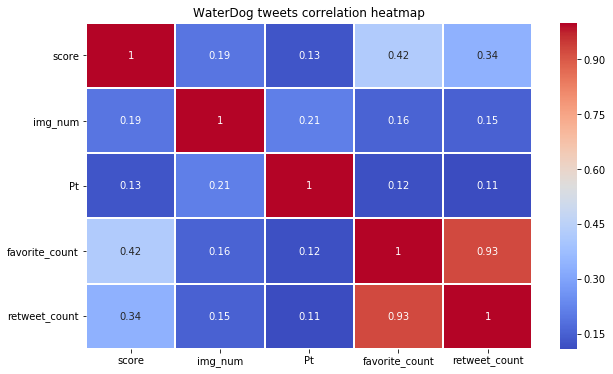

In [1185]:
plt.figure(figsize=(10,6))
sns.heatmap(master_df.corr(),annot=True,cmap='coolwarm',linewidths=1)
plt.title('WaterDog tweets correlation heatmap')
plt.savefig('corr_heatmap.png');

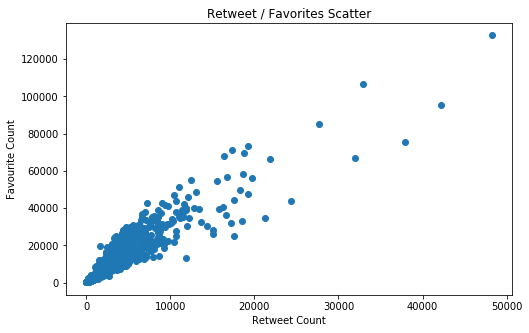

In [1186]:
plt.figure(figsize=(8,5))
plt.scatter(master_df['retweet_count'], master_df['favorite_count'])
plt.title('Retweet / Favorites Scatter')
plt.xlabel('Retweet Count')
plt.ylabel('Favourite Count')
plt.savefig('scatter.png');

## 7.2 - Linear plots




<Figure size 1080x576 with 0 Axes>

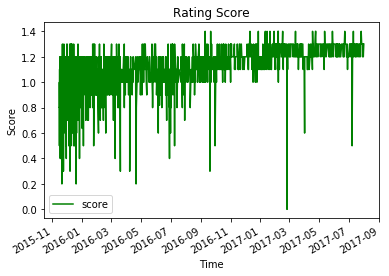

In [1187]:
plt.figure(figsize=(15,8))
master_df.plot(x='timestamp' , y='score',color='g');
plt.title('Rating Score')
plt.xlabel('Time')
plt.ylabel('Score')
plt.savefig('score_line.png');
plt.show();

## 7.3 - Tweets Percentages



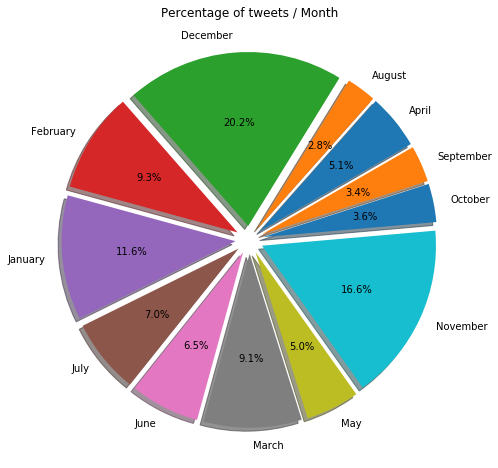

In [1188]:
by_month = master_df.timestamp.dt.month_name()
explode=np.zeros(12)
plt.figure(figsize=(8,8))
master_df.groupby(by_month).tweet_id.count().plot(kind='pie' , explode=explode+0.08 , autopct='%1.1f%%',
        shadow=True, startangle=30)
plt.title('Percentage of tweets / Month')
plt.ylabel('');
plt.savefig('tweet_pie_month.png');

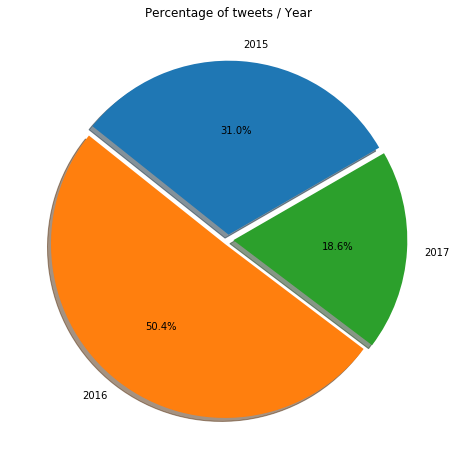

In [1189]:
explode=np.zeros(3)
plt.figure(figsize=(8,8))
master_df.groupby(by_year).tweet_id.count().plot(kind='pie' , explode=explode+0.03 , autopct='%1.1f%%',
        shadow=True, startangle=30)
plt.title('Percentage of tweets / Year')
plt.ylabel('');
plt.savefig('tweet_pie_year.png');

## 7.4 - Normal Distribtion 



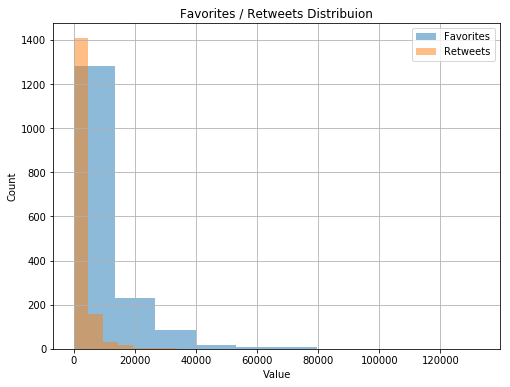

In [1190]:
plt.figure(figsize=(8,6))
master_df.favorite_count.hist(alpha=0.5 , label='Favorites')
master_df.retweet_count.hist(alpha=0.5 , label='Retweets')

plt.title('Favorites / Retweets Distribuion')
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend();
plt.savefig('hist.png');